In [1]:
import mru.iomanager as io
import mru.computevalue as cv
import mru.notebook_utils as nu
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:
def print_srategy_for_n_player(
        gr, n_res, result, cov_set, pos=None, color='r'):
    num_nodes = nx.number_of_nodes(gr)
    placements = result[1]
    strategies = result[2]
    n = n_res
    strategy = np.zeros(shape=(len(strategies[n]), num_nodes))
    prob_strategy = np.zeros(shape=(len(strategies[n])))
    i = 0
    string_routes = [''] * len(strategies[n])
    for stra in strategies[n]:
        for route_pl_id in stra[0]:
            vert = placements[n][route_pl_id[0] - 1][1]
            route = cov_set[vert][route_pl_id[1]].toarray()
            strategy[i] = strategy[i] + route
            r = str(np.where(route == 1)[1]) + '\n'
            string_routes[i] = string_routes[i] + str(vert) + " --> " + r
        prob_strategy[i] = stra[1]
        i += 1
    if pos is None:
        pos = nx.spring_layout(gr)
    for place in range(len(strategies[n])):
        col = ['w'] * num_nodes
        tr = np.where(strategy[place] > 0)[0]
        for i in tr:
            col[i] = color
        plt.figure(place)
        plt.title("probability " + str(prob_strategy[place]))
        plt.figtext(1, 0.5, string_routes[place],
                    verticalalignment='center')
        nx.draw_networkx(gr, node_color=col, pos=pos)
    plt.show()


def print_srategy2_for_n_player(
        gr, n_res, result, pos=None, color='r'):
    num_nodes = nx.number_of_nodes(gr)
    placements = result[1]
    strategies = result[4]
    n = n_res
    strategy = np.zeros(shape=(len(strategies[n]), num_nodes))
    prob_strategy = np.zeros(shape=(len(strategies[n])))
    i = 0
    string_routes = [''] * len(strategies[n])
    for stra in strategies[n]:
        for route_pl_id in stra[0]:
            vert = placements[n][route_pl_id[0] - 1][1]
            route = route_pl_id[1]
            strategy[i] = strategy[i] + route
            r = str(np.where(route == 1)[1]) + '\n'
            string_routes[i] = string_routes[i] + str(vert) + " --> " + r
        prob_strategy[i] = stra[1]
        i += 1
    if pos is None:
        pos = nx.spring_layout(gr)
    for place in range(len(strategies[n])):
        col = ['w'] * num_nodes
        tr = np.where(strategy[place] > 0)[0]
        for i in tr:
            col[i] = color
        plt.figure(place)
        plt.title("probability " + str(prob_strategy[place]))
        plt.figtext(1, 0.5, string_routes[place],
                    verticalalignment='center')
        nx.draw_networkx(gr, node_color=col, pos=pos)
    plt.show()


def print_dead_val(graph):
    tgt = graph.getTargets()
    deadlines = {t: graph.getVertex(t).deadline for t in tgt}
    print("deadlines: " + str(deadlines))
    node_values = {t: graph.getVertex(t).value for t in tgt}
    print("values:")
    for key, val in node_values.items():
        print(str(key) + ": " + str(val))


def compute_nx_graph(graph, plot=False):
    adj = graph.getAdjacencyMatrix()
    adj[adj > 1] = 0
    gr = nx.from_numpy_matrix(adj)
    pos = nx.spring_layout(gr)
    if plot:
        nx.draw_networkx(gr, node_color='y', pos=pos)
    return gr, pos


def sortdict(res, x_label='# resources', y_label='expected utility'):
    val = sorted(res.items())
    x, y = list(zip(*val))
    return x, y


def plotplaceimprove(result, nres, node_val, graph, pos_nodes=None):
    gamevals, plac, _ = zip(*result[5][nres])
    sortimpro = np.argsort(gamevals)
    old = []
    for imp in sortimpro:
        if imp > 0 and gamevals[imp] <= gamevals[imp - 1]:
            continue
        col = ['y'] * len(node_val)
        for tp in plac[imp]:
            col[tp[1]] = 'g'
        if pos_nodes is None:
            pos_nodes = nx.spring_layout(graph)
        plt.figure(imp)
        plt.title("game values = " + str(gamevals[imp]))
        nx.draw_networkx(graph,
                         node_color=col,
                         # node_size=1000,
                         # font_size=20,
                         pos=pos_nodes,
                         with_labels=True)
        node_vals_dict = {i: "{:.2f}".format(v) for i, v in enumerate(node_val)}
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.04)
        nx.draw_networkx_labels(graph,
                                pos_attrs,
                                # font_size=20,
                                labels=node_vals_dict)
        plt.show()

In [3]:
def plotplaceimprove(result, nres, node_val, graph, pos_nodes=None, incremental=True, onlybest=False):
    if onlybest:
        gamevals = result[0][nres]
        plac = result[1][nres]
        sortimpro = 0
    gamevals, plac, _ = zip(*result[5][nres])
    sortimpro = np.argsort(gamevals)
    if not incremental and onlybest:
        raise ValueError
    if not incremental:
        sortimpro = range(len(gamevals))
    if onlybest:
        sortimpro = [sortimpro[-1]]
        
    old = []
    for imp in sortimpro:
        if imp > 0 and gamevals[imp] <= gamevals[imp - 1]:
            pass
        col = ['y'] * len(node_val)
        for tp in plac[imp]:
            col[tp[1]] = 'g'
        if pos_nodes is None:
            pos_nodes = nx.spring_layout(graph)
        plt.figure(imp)
        plt.title("game values = " + str(gamevals[imp]))
        nx.draw_networkx(graph,
                         node_color=col,
                         # node_size=1000,
                         # font_size=20,
                         pos=pos_nodes,
                         with_labels=True)
        node_vals_dict = {i: "{:.2f}".format(v) for i, v in enumerate(node_val)}
        pos_attrs = {}
        for node, coords in pos_nodes.items():
            pos_attrs[node] = (coords[0], coords[1] + 0.04)
        nx.draw_networkx_labels(graph,
                                pos_attrs,
                                # font_size=20,
                                labels=node_vals_dict)
        plt.show()

# Placements

In [4]:
graph = io.load_graph(25, 5, 8, 2)
result = io.load_results(25, 5, 8, 2, enumtype=2)
values = [v.value for v in graph.getVertices()]

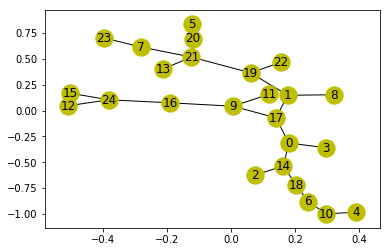

In [5]:
G, layout = compute_nx_graph(graph, plot=True)

In [6]:
result[1]

{2: [(1, 0), (2, 13)],
 3: [(1, 11), (2, 14), (3, 19)],
 4: [(1, 14), (2, 15), (3, 19), (4, 22)],
 5: [(1, 2), (2, 13), (3, 14), (4, 15), (5, 19)],
 6: [(1, 2), (2, 3), (3, 5), (4, 5), (5, 8), (6, 16)]}

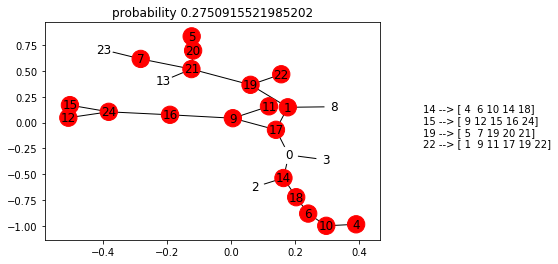

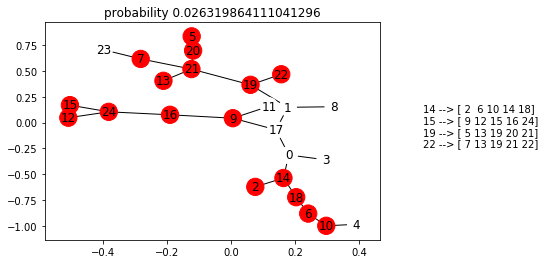

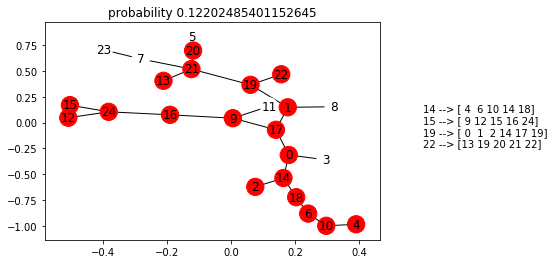

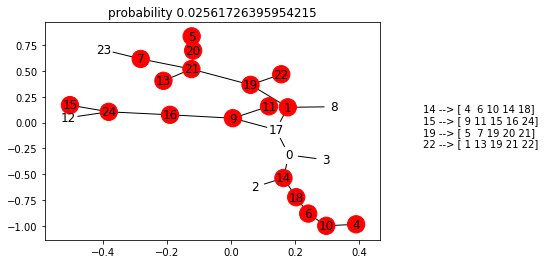

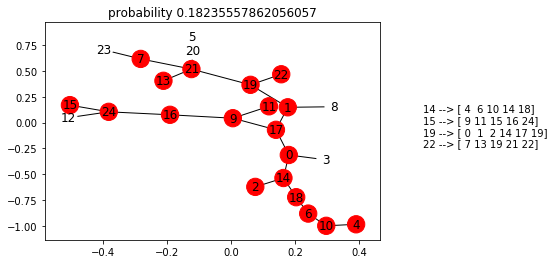

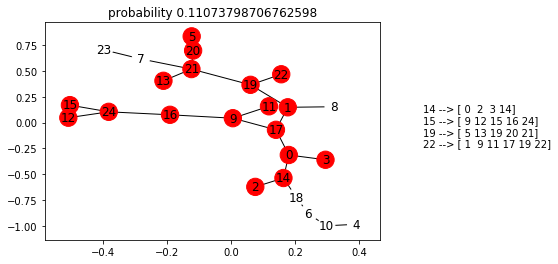

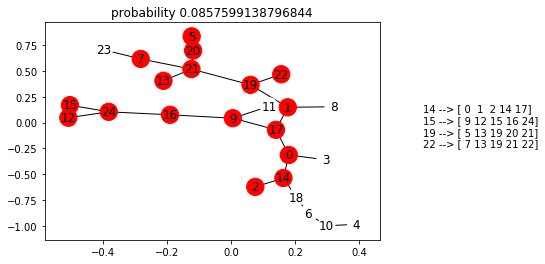

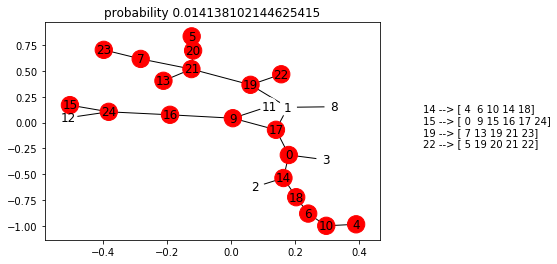

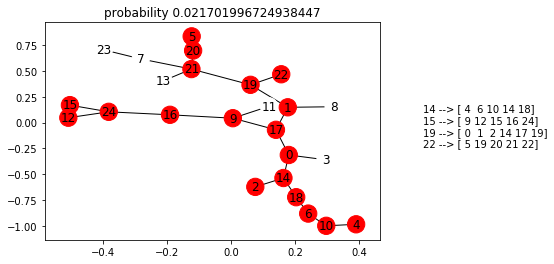

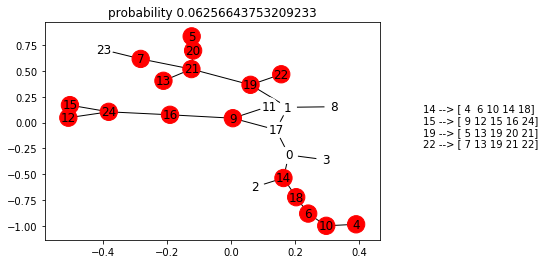

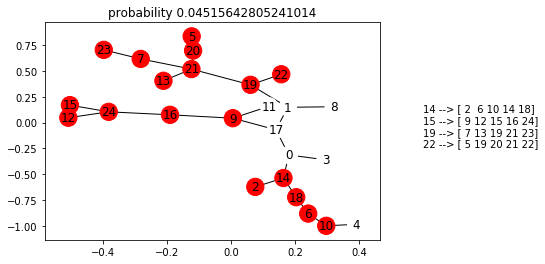

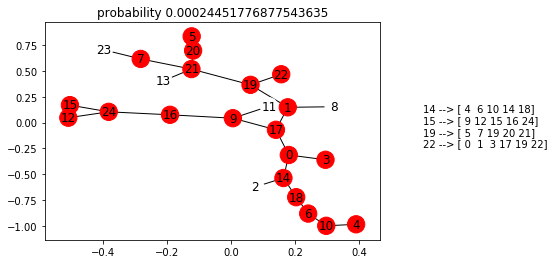

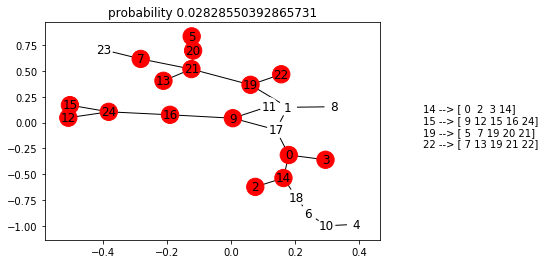

In [7]:
nu.print_srategy_for_n_player(G, 4, result, result[4], layout)

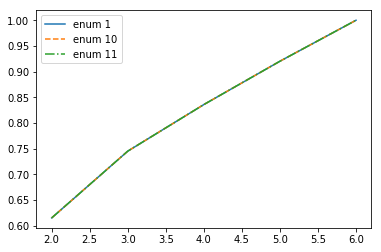

In [10]:
linestyle = iter(["-", "--", "-.", ":"])
labels = []
for e in [30, 10, 11]:
    val = sorted(result[0].items())
    x, y = zip(*val)
    plt.plot(x, y, next(linestyle))
    if e == 30:
        e = 1
    labels.append('enum ' + str(e))
plt.legend(labels, loc='upper left')

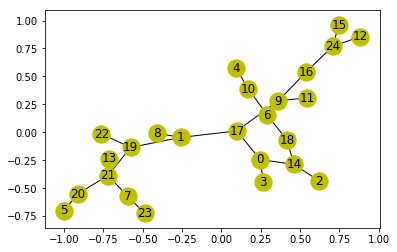

In [11]:
G, layout = nu.compute_nx_graph(graph, plot=True)

## Values Game 7

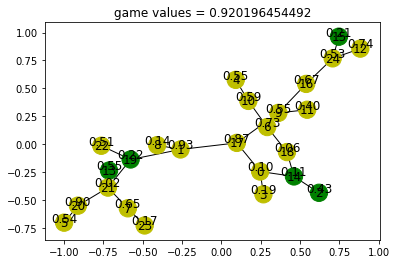

In [12]:
game = 0
enum = 1
numres = 5
plotplaceimprove(result, numres, values, G, layout, onlybest=True)